In [1]:
import h5py
import numpy as np

In [2]:
def read_h5_file(file_path):
    """Reads an HDF5 file and returns seismic images and masks."""
    with h5py.File(file_path, 'r') as f:
        labels = np.array(f['label'])
    return labels
array=read_h5_file('/scratch/nunes/seismic/penobscot.h5')
penobscot_labels=array.transpose(1,2,0)
print(penobscot_labels.shape)

(1501, 481, 601)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import Normalize

def plot_3d_slices(array, my=100, mz=400, mx=100, prop=False):
    """
    Plots 3D slices of a given NumPy array with 8 possible values.
    The slices are taken at the middle of each dimension (XZ, YZ, XY).
    """

    # Define colors for each class
    colors = {
        0: "#0A2F88",  # Dark Blue
        1: "#1873CC",  # Medium Blue
        2: "#39A0ED",  # Light Blue
        3: "#5AC7F9",  # Cyan
        4: "#6ABF4B",  # Green
        5: "#A7D947",  # Yellow-Green
        6: "#FFE400",  # Yellow
        7: "#FFA500",  # Orange
    }

    # Create figure and 3D axis
    fig = plt.figure(figsize=(15, 6))
    ax = fig.add_subplot(111, projection='3d')
    if prop:
        ax.set_box_aspect((array.shape[2], array.shape[1], array.shape[0]))

    # Define slices with correct orientations
    slices = {
        "XZ": (array[my, :, :], "Y", my),  # (Z, X) -> Fix Y
        "XY": (array[:, mz, :], "Z", mz),  # (Y, X) -> Fix Z
        "YZ": (array[:, :, mx], "X", mx),  # (Y, Z) -> Fix X
    }

    # Plot slices with correct orientation
    for name, (slice_2d, fixed_axis, fixed_idx) in slices.items():
        if name == "XY":  # (X, Y) with Y as vertical
            x, y = np.meshgrid(np.arange(slice_2d.shape[1]), np.arange(slice_2d.shape[0]))
            z = np.full_like(x, fixed_idx)
        elif name == "YZ":  # (Z, Y) with Y as vertical
            z, y = np.meshgrid(np.arange(slice_2d.shape[1]), np.arange(slice_2d.shape[0]))
            x = np.full_like(y, fixed_idx)
        elif name == "XZ":  # (X, Z) plotted horizontally
            x, z = np.meshgrid(np.arange(slice_2d.shape[1]), np.arange(slice_2d.shape[0]))
            y = np.full_like(x, fixed_idx)

        # Map colors to values
        colors_mapped = np.vectorize(colors.get)(slice_2d)

        # Plot surface
        ax.plot_surface(x, z, y, facecolors=colors_mapped, rstride=1, cstride=1)

    # Create legend with class labels
    legend_patches = [Patch(facecolor=hex_color, label=f"Class {value}") for value, hex_color in colors.items()]
    ax.legend(handles=legend_patches, title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()


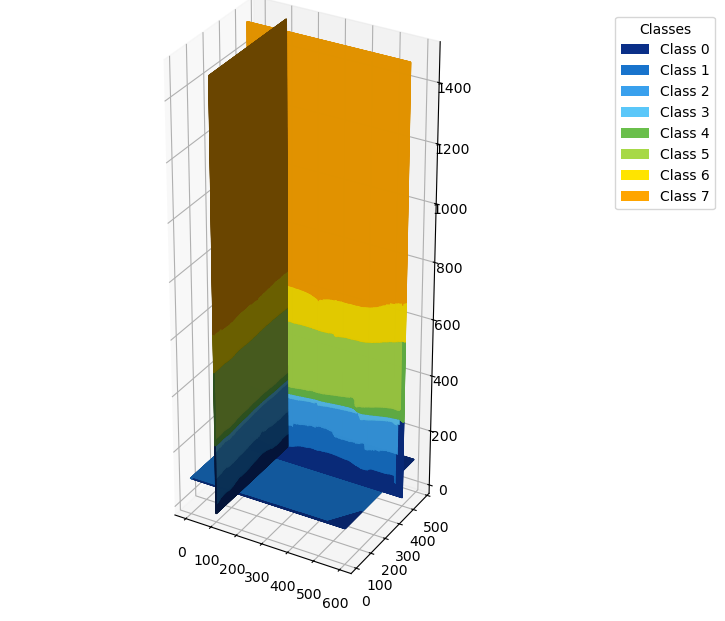

In [4]:
plot_3d_slices(penobscot_labels,prop=True)

In [5]:
read_labels = np.load('/scratch/nunes/seismic/labels_train.npz',
                    allow_pickle=True, mmap_mode = 'r')
parihaka_labels = read_labels['labels']
parihaka_labels[parihaka_labels==6] = 0

In [6]:
parihaka_labels.shape

(1006, 782, 590)

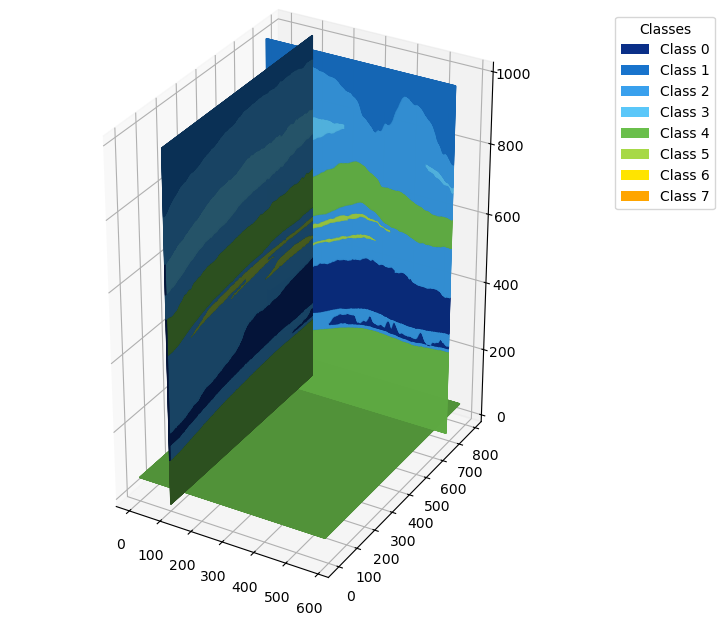

In [7]:
plot_3d_slices(parihaka_labels, my=50, mz=700, mx=100,prop=True)

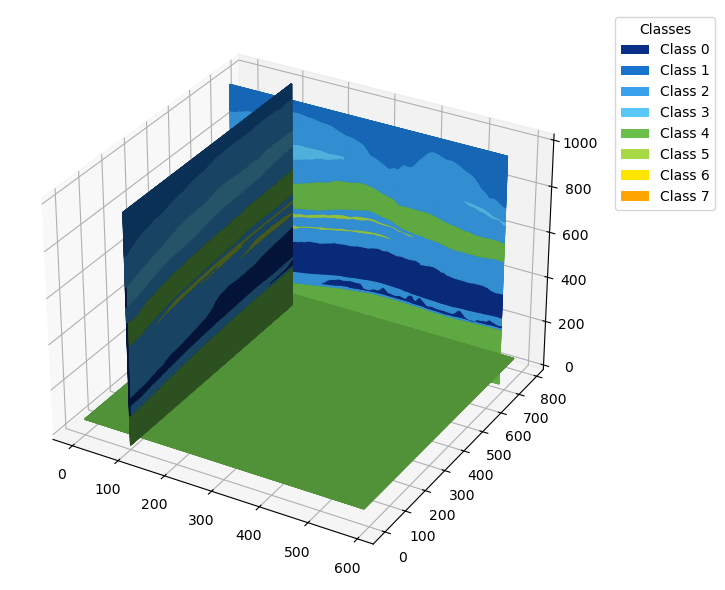

In [8]:
plot_3d_slices(parihaka_labels, my=50, mz=700, mx=100)

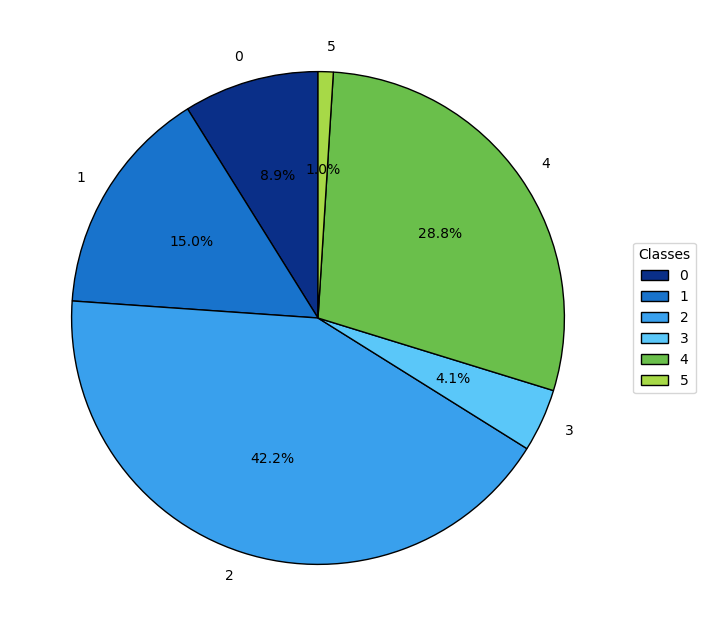

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Seu dicionário de cores personalizado
custom_colors = {
    0: "#0A2F88",  # Dark Blue
    1: "#1873CC",  # Medium Blue
    2: "#39A0ED",  # Light Blue
    3: "#5AC7F9",  # Cyan
    4: "#6ABF4B",  # Green
    5: "#A7D947",  # Yellow-Green
    6: "#FFE400",  # Yellow
    7: "#FFA500",  # Orange
}

def plot_class_distribution(data): 
    """
    Plots a pie chart (pizza graph) showing the class distribution from a NumPy array.
    
    Parameters:
    - data: np.array, array containing class labels (numeric values).
    """
    # Get unique classes and their counts
    unique_classes, counts = np.unique(data, return_counts=True)

    # Map your custom colors to the existing classes
    colors = [custom_colors[cls] for cls in unique_classes]

    # Create the pie chart
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot()
    wedges, texts, autotexts = ax.pie(
        counts,
        labels=unique_classes,
        autopct="%1.1f%%",
        colors=colors,
        startangle=90,
        wedgeprops={"edgecolor": "black"}
    )

    # Create a legend
    ax.legend(wedges, unique_classes, title="Classes", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    plt.show()


# Exemplo de uso
plot_class_distribution(parihaka_labels)
